In [4]:
%load_ext autoreload
%autoreload 2
from utils import *
import itertools
from IPython.display import display, HTML
from scipy.stats import spearmanr
from scipy.stats import pearsonr
ins = BrainSpan()

In [28]:
gtex = pd.read_csv("../data/GTEx.RecGenes.exon.csv")
Exons = pd.read_csv("../data/gencode.v19.genes.v7.patched_contigs.exons.txt", delimiter="\t")
Genes = pd.read_csv("../data/GTEx.RecGenes.gene.rc.csv")
Samples = pd.read_csv("../data/GTEx_v7_Annotations_SampleAttributesDS.txt", delimiter="\t")
Samples = Samples[Samples["SAMPID"].isin(Genes.columns.values)]

In [29]:
print(Genes.columns.values)

['Name' 'Description' 'GTEX-1117F-0226-SM-5GZZ7' ...
 'GTEX-ZVZQ-0006-SM-51MR8' 'GTEX-ZXES-0005-SM-57WCB'
 'GTEX-ZXG5-0005-SM-57WCN']


In [30]:
gtex.head(2)

,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2226-SM-5N9CH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2526-SM-5GZY6,...,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1426-SM-5GZZ6,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2426-SM-5E44I,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O,Name
0,POGZ,4.947368,0.0,14.092105,7.355263,0.486842,5.828947,10.421053,9.776316,8.513158,...,12.078947,11.460526,4.407895,10.671053,21.223684,7.881579,6.697368,9.157895,8.039474,ENSG00000143442.17_1
1,POGZ,4.000000,1.0,7.763158,25.171053,7.000000,17.552631,19.842106,14.578947,20.171053,...,25.381578,13.302632,12.539474,20.657894,34.197370,4.105263,9.460526,1.000000,7.000000,ENSG00000143442.17_2


In [34]:
RecGenes = set(gtex["Description"].values)
RecGenesEns = set(Genes["Name"].values)
samples = Samples["SAMPID"].values

DIP2A


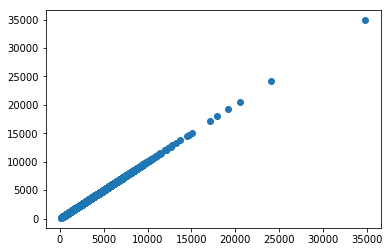

WDFY3


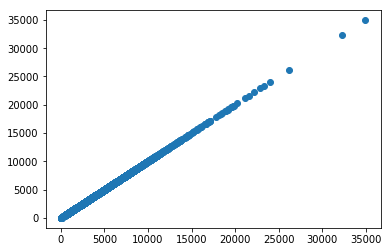

WAC


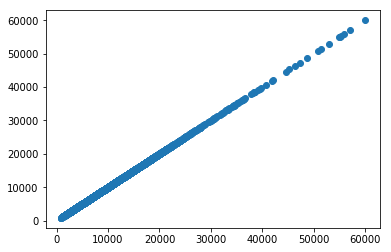

DSCAM


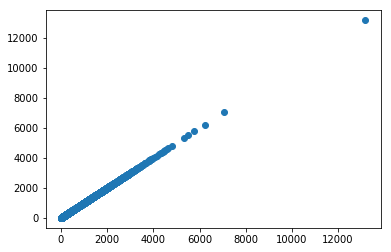

FOXP1


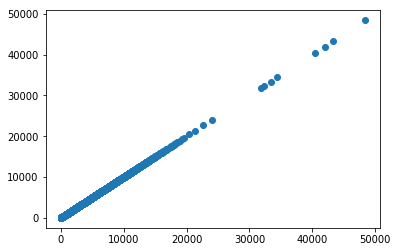

CHD2


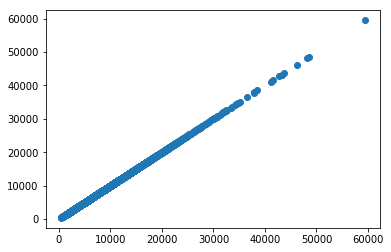

NCKAP1


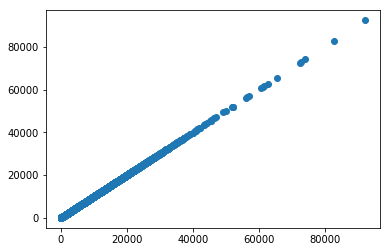

GRIN2B


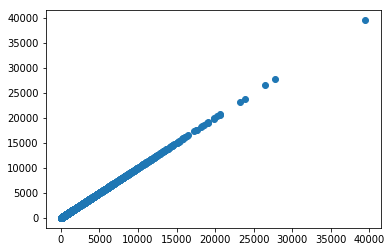

SCN2A


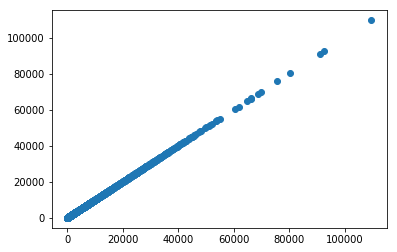

KDM5B


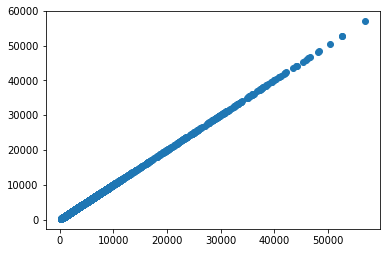

ANK2


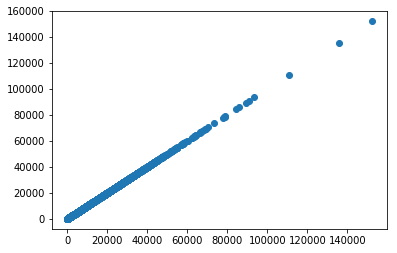

POGZ


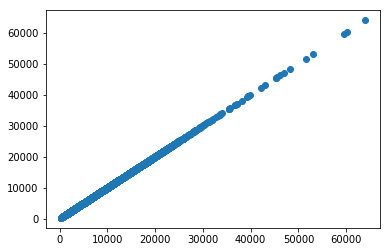

KMT2E


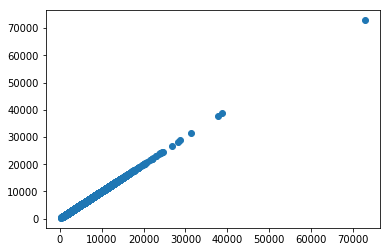

MED13L


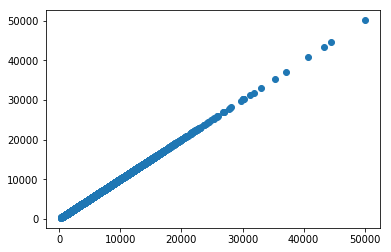

TBR1


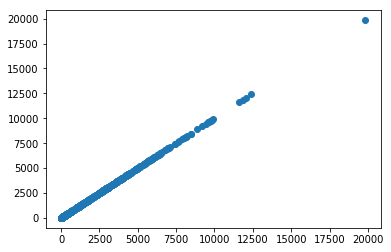

ADNP


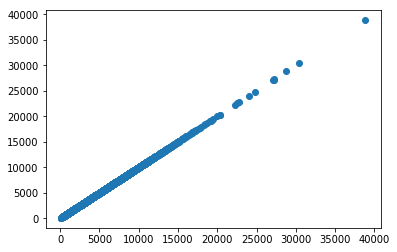

TNRC6B


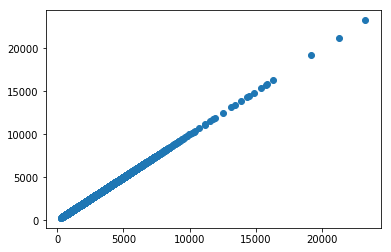

RIMS1


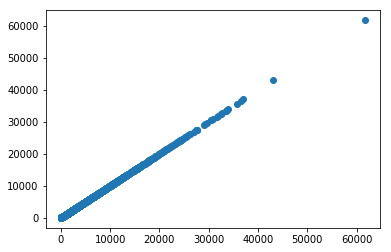

KDM6B


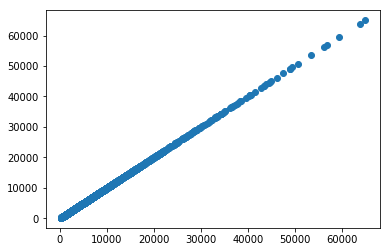

PHF2


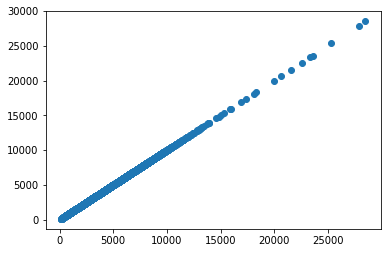

CHD8


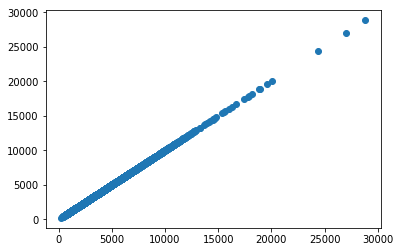

GIGYF1


KeyboardInterrupt: 

In [11]:
for gene in list(RecGenes):
    print(gene)
    exon_dat, gene_dat = [], []
    for sp in samples:
        if sp not in set(Genes.columns):
            continue
        gene_sp_rc = Genes[Genes["Description"]==gene][sp].values[0]
        exon_sp_rc = sum(gtex[gtex["Description"]==gene][sp].values)
        exon_dat.append(exon_sp_rc)
        gene_dat.append(gene_sp_rc)
    plt.scatter(exon_dat, gene_dat)
    plt.show()
    #print(gene)

In [9]:
for l in open("../data/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_reads.gct"):
    if l.startswith("Name"):
        samples = l.strip().split("\t")[2:]
        res = [0]*len(samples)
    else:
        llist = [float(x) for x in l.strip().split("\t")[2:]]
        for i in range(len(llist)):
            res[i] += float(llist[i])

In [13]:
print(len(res))

11688


In [16]:
outfile = open("../data/GTEx.sample.total.readcount.txt", 'wt')
for sp, value in zip(samples, res):
    outfile.write("{}\t{}\n".format(sp, value))

In [54]:
def RPKM(ReadCount, Length, Libsize):
    ReadCount = float(ReadCount)
    return (ReadCount * 1e9) / (Libsize*Length)

In [26]:
# summerize gene length and exon length
gtx_exon = pd.read_csv("../data/gencode.v19.genes.v7.patched_contigs.exons.txt", delimiter="\t")
gtx_exon["Gene"] = gtx_exon.apply(lambda row:row["exon_id"].split("_")[0], axis=1)
gtx_exon["ExonLength"] = gtx_exon["end_pos"] - gtx_exon["start_pos"]

In [80]:
Exon2Length = dict(zip(gtx_exon["exon_id"].values, gtx_exon["ExonLength"].values))

In [36]:
Ens2Length = {}
for gene in list(RecGenesEns):
    df = gtx_exon[gtx_exon["Gene"]==gene]
    Ens2Length[gene] = sum(df["ExonLength"].values)

In [27]:
gtx_exon.head(2)

,exon_id,chr,start_pos,end_pos,strand,Gene,ExonLength
0,ENSG00000223972.4_1,1,11869,12227,+,ENSG00000223972.4,358
1,ENSG00000223972.4_2,1,12595,12721,+,ENSG00000223972.4,126


In [84]:
#Samples.groupby("SMTS").count()["SAMPID"]
# Brain, Blood, Skin
BrainSamples = Samples[Samples["SMTS"]=="Brain"]["SAMPID"].values
BloodSamples = Samples[Samples["SMTS"]=="Blood"]["SAMPID"].values
SkinSamples = Samples[Samples["SMTS"]=="Skin"]["SAMPID"].values

In [18]:
fin = open("../data/GTEx.sample.total.readcount.txt", 'rt')
SP2Libsize = {}
for l in fin:
    sp, libsize = l.split("\t")
    SP2Libsize[sp] = float(libsize)

In [78]:
# Get Gene RPKM
GeneRC = pd.read_csv("../data/GTEx.RecGenes.gene.rc.csv")
GeneRC.set_index("Name", inplace=True)
for SP in GeneRC.columns.values[1:]:
    for gene in GeneRC.index.values:
        #rint(GeneRC.loc[gene, SP])
        GeneRC.loc[gene, SP] = round(RPKM(GeneRC.loc[gene, SP], Ens2Length[gene], SP2Libsize[SP]), 2)
GeneRC.to_csv("../data/GTEx.RecGenes.gene.rpkm.csv", index="False")

In [82]:
# Get Exon RPKM
ExonRC = pd.read_csv("../data/GTEx.RecGenes.exon.rc.csv")
ExonRC.set_index("Name", inplace=True)
for SP in ExonRC.columns.values[1:]:
    for exon in ExonRC.index.values:
        ExonRC.loc[exon, SP] = round(RPKM(ExonRC.loc[exon, SP], Exon2Length[exon], SP2Libsize[SP]), 2)
ExonRC.to_csv("../data/GTEx.RecGenes.exon.rpkm.csv", index="False")

In [88]:
GeneRPKM = pd.read_csv("../data/GTEx.RecGenes.gene.rpkm.csv")
GeneRPKM.set_index("Name", inplace=True)
GeneRPKM.head(2)

,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000143442.17,POGZ,10.74,13.35,22.06,14.47,11.54,15.06,14.74,19.75,14.31,...,3.61,4.90,4.89,5.34,9.64,10.20,3.23,4.67,5.76,8.44
ENSG00000117139.12,KDM5B,10.48,6.45,6.92,6.92,5.22,5.55,4.51,7.36,9.32,...,7.59,3.12,4.23,3.56,12.17,10.94,5.43,4.64,5.25,13.55


In [119]:
ExonRPKM = pd.read_csv("../data/GTEx.RecGenes.exon.rpkm.csv")
ExonRPKM.set_index("Name", inplace=True)
ExonRPKM.head(2)

,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2226-SM-5N9CH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2526-SM-5GZY6,...,GTEX-ZZPU-1126-SM-5N9CW,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1426-SM-5GZZ6,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2426-SM-5E44I,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O
Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000143442.17_1,POGZ,0.33,0.00,1.04,0.46,0.03,0.45,0.67,0.77,0.47,...,0.55,0.54,0.78,0.28,0.48,1.53,0.59,0.34,0.44,0.44
ENSG00000143442.17_2,POGZ,0.35,0.09,0.76,2.09,0.63,1.79,1.69,1.53,1.50,...,0.02,1.51,1.20,1.05,1.23,3.28,0.41,0.64,0.06,0.51


In [85]:
print(BrainSamples)

['GTEX-1117F-3226-SM-5N9CT' 'GTEX-111FC-3126-SM-5GZZ2'
 'GTEX-111FC-3326-SM-5GZYV' ... 'GTEX-ZYY3-3126-SM-5SI9L'
 'GTEX-ZZPT-2926-SM-5EQ5S' 'GTEX-ZZPT-3026-SM-5GZXH']


In [132]:
# GeneExpinTissues
BrainExp = GeneRPKM[BrainSamples]
BloodExp = GeneRPKM[BloodSamples]
SkinExp = GeneRPKM[SkinSamples]

Tissue2Exp = {}
Tissue2Exp["Brain"] = (GeneRPKM[["Description"]+list(BrainSamples)], ExonRPKM[["Description"]+list(BrainSamples)])
Tissue2Exp["Blood"] = (GeneRPKM[["Description"]+list(BloodSamples)], ExonRPKM[["Description"]+list(BloodSamples)])
Tissue2Exp["Skin"]  = (GeneRPKM[["Description"]+list(SkinSamples)], ExonRPKM[["Description"]+list(SkinSamples)])

In [133]:
Tissue2Exp["Brain"][1].head(2)

,Description,GTEX-1117F-3226-SM-5N9CT,GTEX-111FC-3126-SM-5GZZ2,GTEX-111FC-3326-SM-5GZYV,GTEX-1128S-2726-SM-5H12C,GTEX-1128S-2826-SM-5N9DI,GTEX-117XS-3026-SM-5N9CA,GTEX-117XS-3126-SM-5GIDP,GTEX-1192X-3126-SM-5N9BY,GTEX-1192X-3226-SM-5987D,...,GTEX-ZXG5-0011-R5b-SM-57WBN,GTEX-ZXG5-0011-R6a-SM-57WBZ,GTEX-ZXG5-0011-R7b-SM-57WCC,GTEX-ZXG5-0011-R8a-SM-57WD1,GTEX-ZYFD-2926-SM-5GID9,GTEX-ZYFD-3026-SM-5E44C,GTEX-ZYY3-3026-SM-5GIEJ,GTEX-ZYY3-3126-SM-5SI9L,GTEX-ZZPT-2926-SM-5EQ5S,GTEX-ZZPT-3026-SM-5GZXH
Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000143442.17_1,POGZ,0.02,0.71,0.89,0.38,0.5,0.27,1.02,0.21,0.87,...,0.13,0.51,0.22,0.16,0.60,0.54,0.68,0.55,0.39,0.28
ENSG00000143442.17_2,POGZ,0.76,1.90,2.20,0.76,3.4,1.27,2.73,1.84,2.29,...,0.75,1.73,0.58,0.42,2.25,2.33,3.17,0.93,1.15,0.87


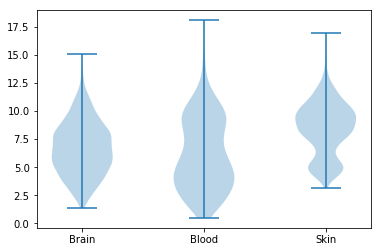

In [114]:
Gene = "ENSG00000136531.9"
Gene = "ENSG00000114861.14"
Gene = "ENSG00000157540.15"
ax = plt.subplot(111)
pos = [1,2,3]
plt.violinplot([BrainExp.loc[Gene,:].values, BloodExp.loc[Gene,:].values, SkinExp.loc[Gene,:].values], pos)
ax.set_xticks(pos)
ax.set_xticklabels(["Brain", "Blood", "Skin"])
plt.xlabel
plt.show()

In [154]:
Jiayao_features = pd.read_csv("unifiedmodel/features.jiayao.65.csv")
Variants = Jiayao_features[['familyId', 'vcfVariant', 'inChild', 'effectGene', 'effectType',
       'gender', 'VIQ', 'NVIQ', 'Age',]]
Variants.loc[Variants["effectGene"]=="MLL5", "effectGene"] = "KMT2E" #MLL5 
Variants.columns

Index(['familyId', 'vcfVariant', 'inChild', 'effectGene', 'effectType',
       'gender', 'VIQ', 'NVIQ', 'Age'],
      dtype='object')

In [155]:
Gene2Ens = pd.read_csv("../data/GTEx.ENSG2SYMBOL.txt", delimiter="\t", names=[1,2])
Gene2Ens = dict(zip(Gene2Ens[2].values, Gene2Ens[1].values))

In [156]:
def sudogmean(values):
    values = [(x+1) for x in values]
    gmean = scipy.stats.mstats.gmean(values)
    return gmean-1
def searchExon(Gene, Chr, Pos, Ref, Alt, ExonRow):
    Pos, LenV = int(Pos), len(Ref)-len(Alt)
    ExonRow = ExonRow[ExonRow["Gene"]==Gene2Ens[Gene]]
    for i, row in ExonRow.iterrows():
        exon_id, start, end = row["exon_id"],int(row["start_pos"]),int(row["end_pos"])
        if Pos > start -3 and Pos < end + 3:
            return exon_id
        elif LenV > 0: # a delition may span a splice site
            if (Pos < start-3 and Pos + LenV > start ) or (Pos < end and Pos + LenV > end +3):
                return exon_id
    return 0

Variants["ExonID"] = 0
for Tissue in ["Brain", "Blood", "Skin"]:
    Variants["%sGeneExp.amean"%Tissue] = 0.0
    Variants["%sGeneExp.gmean"%Tissue] = 0.0
    Variants["%sExonExp.amean"%Tissue] = 0.0
    Variants["%sExonExp.gmean"%Tissue] = 0.0
for i, row in Variants.iterrows():
    famid, gene, (Chr, Pos, Ref, Alt) = row["familyId"], row["effectGene"], row["vcfVariant"].split(":")
    #ens = Ens2Gene(gene)
    try:
        Variants.loc[i, "Age"] = famid2age[str(famid)]
    except:
        Variants.loc[i, "Age"] = 0
    try:
        #GeneExp = GeneRPKM[GeneRPKM["Description"]==gene]
        for Tissue in ["Brain", "Blood", "Skin"]:
            df = Tissue2Exp[Tissue][0]
            #TissueExp = df.loc[Gene,:]
            TissueExp = df[df["Description"]==gene].values[0][1:]
            gene_nmean, gene_gmean = np.mean(TissueExp), sudogmean(TissueExp)
            Variants["%sGeneExp.amean"%Tissue] = gene_nmean
            Variants["%sGeneExp.gmean"%Tissue] = gene_gmean
    except IndexError:
        print("gene not find", famid, gene)
    
    exonId = searchExon(gene, Chr, Pos, Ref, Alt, gtx_exon)
    
    if len(Ref) == len(Alt):
        Variants.loc[i, "KEY"] = "%s-%s:%d"%(famid, Chr, int(Pos))
    else:
        Variants.loc[i, "KEY"] = "%s-%s:%d"%(famid, Chr, int(Pos)+1)
    if exonId != 0:
        Variants.loc[i, "ExonID"] = exonId
        
        for Tissue in ["Brain", "Blood", "Skin"]:
            df = Tissue2Exp[Tissue][1]
            TissueExp = df[df.index==exonId].values[0][1:]
            exon_nmean, exon_gmean = np.mean(TissueExp), sudogmean(TissueExp)
            Variants.loc[i, "%sExonExp.amean"%Tissue] = exon_nmean
            Variants.loc[i, "%sExonExp.gmean"%Tissue] = exon_gmean
            Variants.loc[i, "%sRel.exp.amean"%Tissue] = exon_nmean/Variants.loc[i, "%sGeneExp.amean"%Tissue]
            Variants.loc[i, "%sRel.exp.gmean"%Tissue] = exon_gmean/Variants.loc[i, "%sGeneExp.gmean"%Tissue]
    else:
        print("exon not find", famid, gene)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

In [170]:
print(Variants.shape)
Variants.head()
Variants.to_csv("../data/GTEx.2Tissue.Pred.65.csv", index=False)

(65, 30)


In [158]:
Tissue = "Brain"
gene2slope = {}
ALL_RelExp = np.array([])
ALL_Normed_IQD = np.array([])
Genes = list(set(Variants["effectGene"].values))
for gene in Genes:
    df = Variants[Variants["effectGene"]==gene]
    IQs = [max(0, (100-x)) for x in df["NVIQ"].values]
    #rel_exps = [x for x in df["Rel.exp.amean"].values] #Rel.exp.prenatal
    #rel_exps = [x for x in df["Rel.exp.prenatal"].values] #Rel.exp.prenatal
    rel_exps = [x for x in df["%sRel.exp.amean"%Tissue].values]
    regr = regGene(rel_exps, IQs)
    slope = regr.coef_[0]
    #if slope == 0:
    #    continue
    gene2slope[gene] = slope
    ALL_RelExp = np.append(ALL_RelExp, rel_exps)
    NormIQDs = np.array([x/slope for x in IQs])
    ALL_Normed_IQD = np.append(ALL_Normed_IQD, NormIQDs)

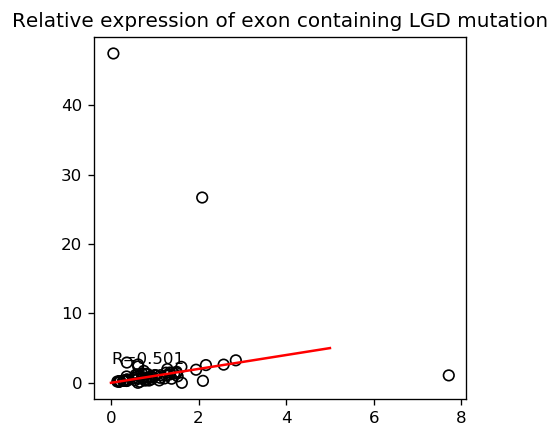

In [188]:
model = linear_model.LinearRegression(fit_intercept=False)
ALL_RelExp = ALL_RelExp.reshape(-1,1)
R, P = scipy.stats.pearsonr([x[0] for x in ALL_RelExp], ALL_Normed_IQD) 
R, P = scipy.stats.spearmanr([x[0] for x in ALL_RelExp], ALL_Normed_IQD) 
plt.figure(figsize=(4,4), dpi=120)
plt.title("Relative expression of exon containing LGD mutation")
model.fit(ALL_RelExp, ALL_Normed_IQD)
plt.scatter(ALL_RelExp, ALL_Normed_IQD, s=40, facecolors='none', edgecolors='black')
plt.plot([0, 5], [0,model.predict([[5.0]])], color='red')
plt.text(0, 2.7, "R=%.3f"%(R))
#plt.xlim((0,5))
#plt.ylim((0,5))
plt.show()

Brain [12.87277512] [20.83830984]


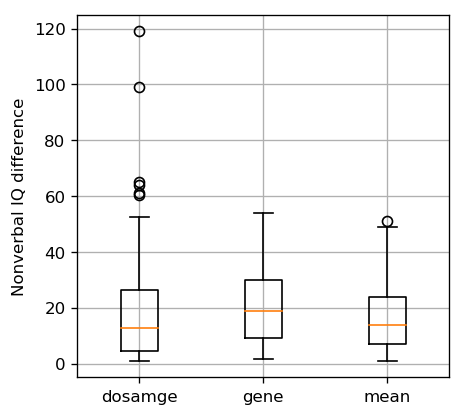

Blood [18.33286628] [22.46464079]


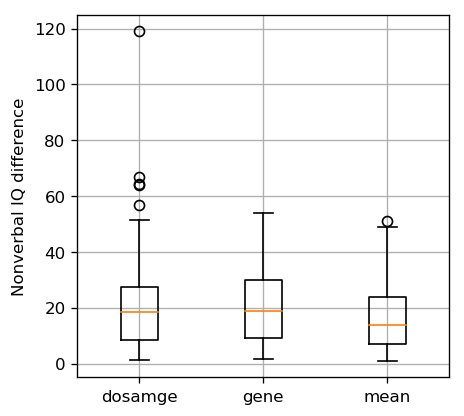

Skin [17.97313676] [22.73965173]


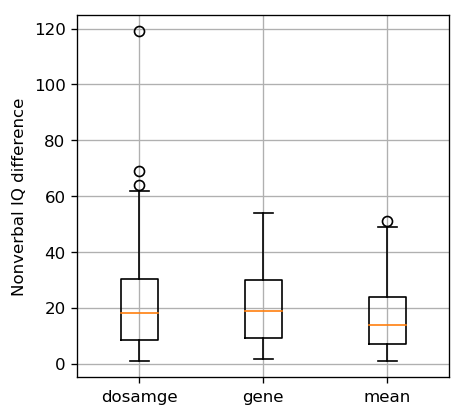

In [174]:
Variants = pd.read_csv("../data/GTEx.2Tissue.Pred.65.csv")
ExcludeList = ["13398-1:151377904", "13627-1:151378489", "13664-1:202698172", "13447-6:157527665", 
               "12323-9:96439930", "13545-20:49509095", "12130-20:49510028", "12764-2:183791570", "13735-21:41414331"]
Variants = Variants[~Variants["familyId"].isin(ExcludeList)]
GTExDosagePredErrs = {}
for Tissue in ["Brain", "Blood", "Skin"]:
    IQ_diff1, IQ_diff2, IQ_diff3 = [], [], []
    avg_IQ = np.mean(Variants["NVIQ"].values)
    N = 0
    for i, row in Variants.iterrows():
        familyId, gene, ralexp, IQ = row["familyId"], row["effectGene"], row["%sRel.exp.gmean"%Tissue], row["NVIQ"]
        df = Variants[(Variants["effectGene"]==gene) & (Variants["familyId"]!=familyId)]
        IQs = df["NVIQ"].values
        IQDiffs = [max(0, (100-x)) for x in IQs]
        rel_exps = [x for x in df["%sRel.exp.gmean"%Tissue].values]
        regr = regGene(rel_exps, IQDiffs)
        slope = regr.coef_[0]
        IQpre_dosage = max(0, (100 - slope * ralexp))

        IQpre_gene = np.mean(IQs)
        if abs(IQ - IQpre_dosage) > 50:
            pass
            #print(familyId, gene, IQ, IQpre_dosage, ralexp)
        IQ_diff1.append(abs(IQ - IQpre_dosage))
        IQ_diff2.append(abs(IQ - IQpre_gene))
        IQ_diff3.append(abs(IQ - 70))
        N += 1
    plt.figure(figsize=(4,4), dpi=120)
    plt.boxplot([IQ_diff1, IQ_diff2, IQ_diff3], labels = ["dosamge", "gene", "mean"])
    GTExDosagePredErrs[Tissue] = IQ_diff1
    plt.ylabel("Nonverbal IQ difference")
    plt.grid(True)
    print(Tissue, np.median(IQ_diff1), np.mean(IQ_diff1))
    plt.show()

In [184]:
print(scipy.stats.mannwhitneyu(GTExDosagePredErrs["Brain"], GTExDosagePredErrs["Blood"], alternative="less"))
print(scipy.stats.mannwhitneyu(GTExDosagePredErrs["Brain"], GTExDosagePredErrs["Skin"], alternative="less"))

MannwhitneyuResult(statistic=1828.5, pvalue=0.09338922629259405)
MannwhitneyuResult(statistic=1824.0, pvalue=0.08994001524188489)


In [182]:
print(scipy.stats.wilcoxon(GTExDosagePredErrs["Brain"], GTExDosagePredErrs["Blood"]))
print(scipy.stats.wilcoxon(GTExDosagePredErrs["Brain"], GTExDosagePredErrs["Skin"]))

WilcoxonResult(statistic=532.0, pvalue=0.04614173089383797)
WilcoxonResult(statistic=612.5, pvalue=0.18695953897604678)


In [167]:
ExonCount = Variants.groupby("ExonID")["ExonID"].count()
Variants["ExonCount"] = Variants.apply(lambda row: ExonCount[row["ExonID"]], axis=1)
SameExon = Variants[Variants["ExonCount"]>=2]